In [1]:
# Exercise¶
# Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

# Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
# Plot bar charts showing impact of employee salaries on retention
# Plot bar charts showing corelation between department and employee retention
# Now build logistic regression model using variables that were narrowed down in step 1
# Measure the accuracy of the model

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
# Read employee retention dataset
file_path = "HR_comma_sep.csv"
df = pd.read_csv(file_path)

In [6]:
# Question 1: Exploratory Data Analysis (EDA)
df_encoded = df.copy()
df_encoded["salary"] = LabelEncoder().fit_transform(df["salary"])  # Encode salary (low=0, medium=1, high=2)
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)  # One-hot encode

correlation_matrix = df_encoded.corr()

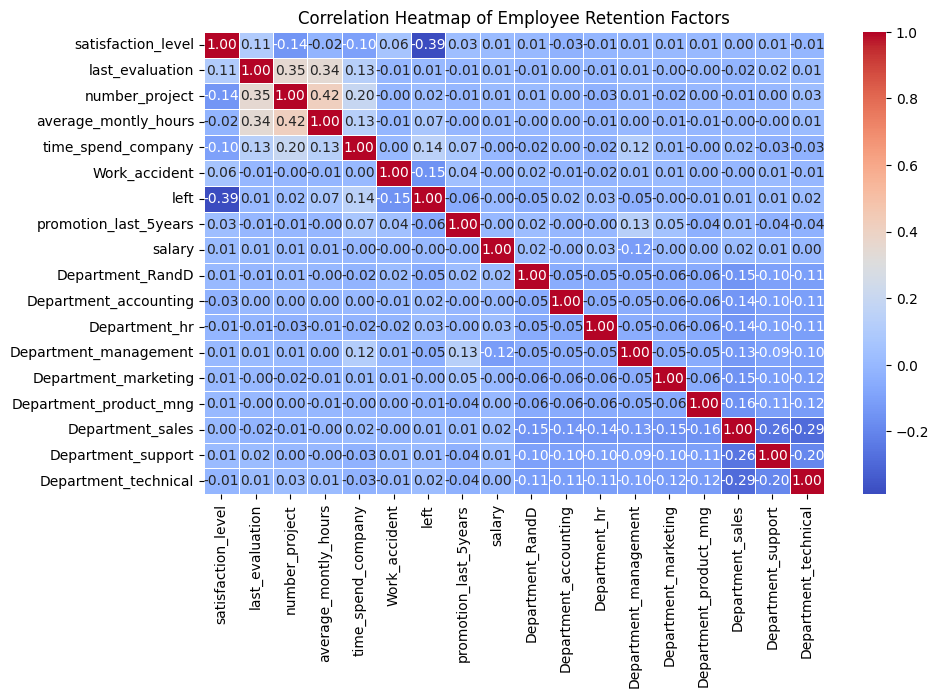

In [7]:
# Variables having direct and clear impact on employee retention (Heatmap)
correlations = correlation_matrix["left"].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Employee Retention Factors")
plt.show()

In [8]:
print("Top correlated features with employee leaving:")
print(correlations)

Top correlated features with employee leaving:
left                      1.000000
time_spend_company        0.144822
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
salary                   -0.001294
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64


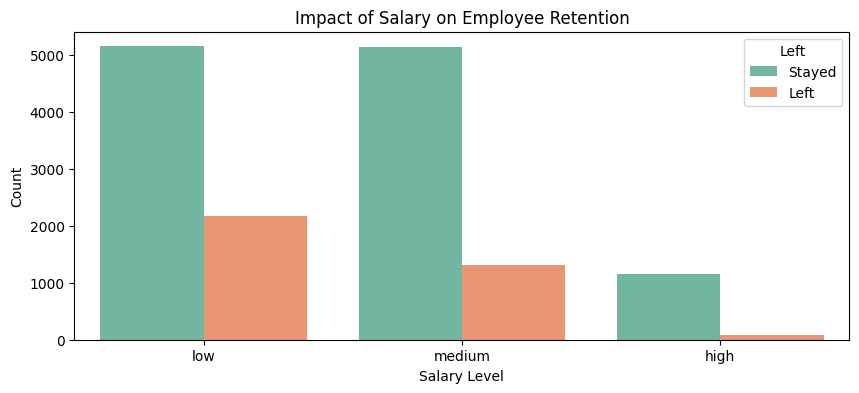

In [9]:
# Question 2: Plotting bar charts showing impact of salary on retention
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x="salary", hue="left", palette="Set2")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

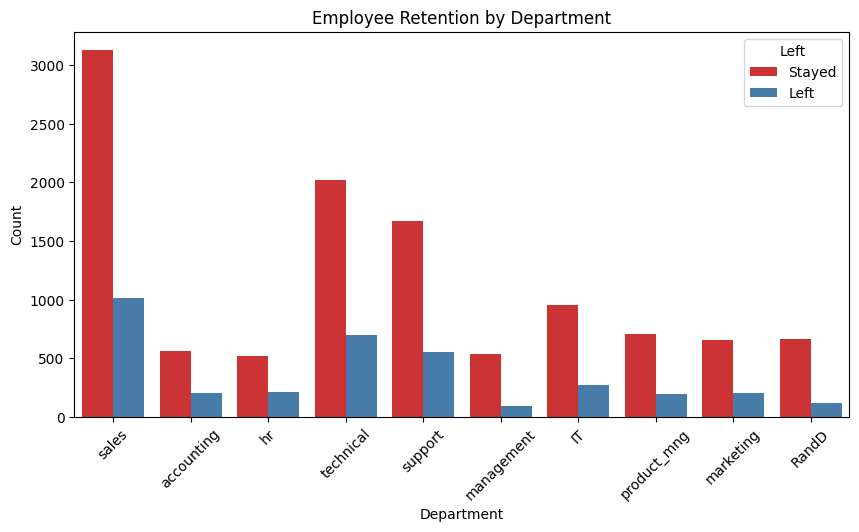

In [10]:
# Question 3: Plotting bar charts showing correlation between department and retention
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Department", hue="left", palette="Set1")
plt.xticks(rotation=45)
plt.title("Employee Retention by Department")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Left", labels=["Stayed", "Left"])
plt.show()

In [11]:
# Question 4: Building Logistic Regression Model using selected features
df_encoded = df.copy()
df_encoded["salary"] = LabelEncoder().fit_transform(df["salary"])  # Encode salary (low=0, medium=1, high=2)
df_encoded = pd.get_dummies(df_encoded, columns=["Department"], drop_first=True)  # One-hot encode Department

In [12]:
# Selecting features
features = ["satisfaction_level", "time_spend_company", "Work_accident",
            "promotion_last_5years", "salary"] + [col for col in df_encoded.columns if "Department_" in col]

X = df_encoded[features]
y = df_encoded["left"]

In [13]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Standardize
scaler = StandardScaler()
X_train[["satisfaction_level", "time_spend_company"]] = scaler.fit_transform(X_train[["satisfaction_level", "time_spend_company"]])
X_test[["satisfaction_level", "time_spend_company"]] = scaler.transform(X_test[["satisfaction_level", "time_spend_company"]])

In [15]:
# Training Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
# Question 5: Measuring the accuracy of the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.7747
